In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [10]:
# Load the train data

train = pd.read_csv("C:\\Users\\hp\\Python Projects\\Projects\\Project_Logistic_Regression_Predict_Insurance_Claim\\train.csv")

train.head(10)

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.300,0,0,3,2632.99200,1
1,990,26,0,19.800,1,0,3,3378.91000,0
2,123,44,1,31.350,1,1,0,39556.49450,1
3,184,44,1,30.690,2,0,2,7731.42710,0
4,1167,29,0,24.600,2,0,3,4529.47700,0
5,610,47,0,29.370,1,0,2,8547.69130,0
6,915,24,0,33.990,0,0,2,2473.33410,1
7,1137,26,0,22.230,0,0,1,3176.28770,0
8,1163,18,0,28.215,0,0,0,2200.83085,1
9,798,58,0,33.100,0,0,3,11848.14100,1


Shape of the train data is: (1070, 9)

Statistical properties of the data are as follows:
                Id          age          sex          bmi     children  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean    668.617757    39.030841     0.495327    30.490196     1.128037   
std     385.470930    13.951271     0.500212     6.109707     1.211675   
min       1.000000    18.000000     0.000000    15.960000     0.000000   
25%     333.250000    27.000000     0.000000    26.030000     0.000000   
50%     676.500000    39.000000     0.000000    30.140000     1.000000   
75%    1000.500000    51.000000     1.000000    34.320000     2.000000   
max    1337.000000    64.000000     1.000000    53.130000     5.000000   

            smoker       region       charges  insuranceclaim  
count  1070.000000  1070.000000   1070.000000     1070.000000  
mean      0.203738     1.516822  13262.895208        0.568224  
std       0.402965     1.110035  12125.948212      

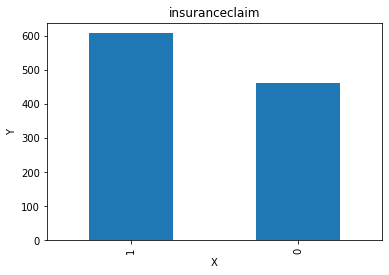

In [11]:

# Shape of the data
print("Shape of the train data is:",train.shape)

print()

# Statistical properties of the data.
print("Statistical properties of the data are as follows:")
print(train.describe())

# Drop the Id.
train.drop('Id',axis=1,inplace=True)

# Checking for the class distribution of the target
train['insuranceclaim'].value_counts().plot(kind='bar')
plt.title('insuranceclaim')
plt.xlabel('X')
plt.ylabel('Y')

print()

# Checking for skewness in the features
print('Skewness for different features is as shown below:')
print(train.skew())

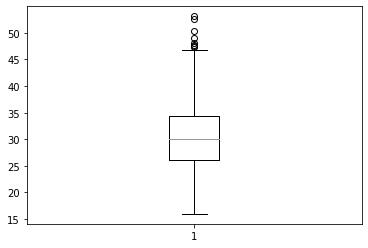

1    0.568224
0    0.431776
Name: insuranceclaim, dtype: float64

In [15]:
# Using boxpolt, check for Outliers. Plot the boxplot 

plt.boxplot(train['bmi'])

plt.show()

# set quantile (0.95)
q_value = train['bmi'].quantile(0.95)

# Check the value counts of the target
train['insuranceclaim'].value_counts(normalize=True)



In [16]:
# check the correlation of X_train
relation = train.corr()
print(relation)

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.026319  0.091499  0.061800 -0.012933  0.006400   
sex            -0.026319  1.000000  0.047436  0.032628  0.074341  0.018674   
bmi             0.091499  0.047436  1.000000  0.033350  0.005660  0.158037   
children        0.061800  0.032628  0.033350  1.000000  0.021243  0.027956   
smoker         -0.012933  0.074341  0.005660  0.021243  1.000000  0.006970   
region          0.006400  0.018674  0.158037  0.027956  0.006970  1.000000   
charges         0.316429  0.057600  0.197609  0.088766  0.778644 -0.001329   
insuranceclaim  0.083923  0.022043  0.366515 -0.386124  0.342564  0.014917   

                 charges  insuranceclaim  
age             0.316429        0.083923  
sex             0.057600        0.022043  
bmi             0.197609        0.366515  
children        0.088766       -0.386124  
smoker          0.778644        0.342564  
region         -0.001329        0.01491

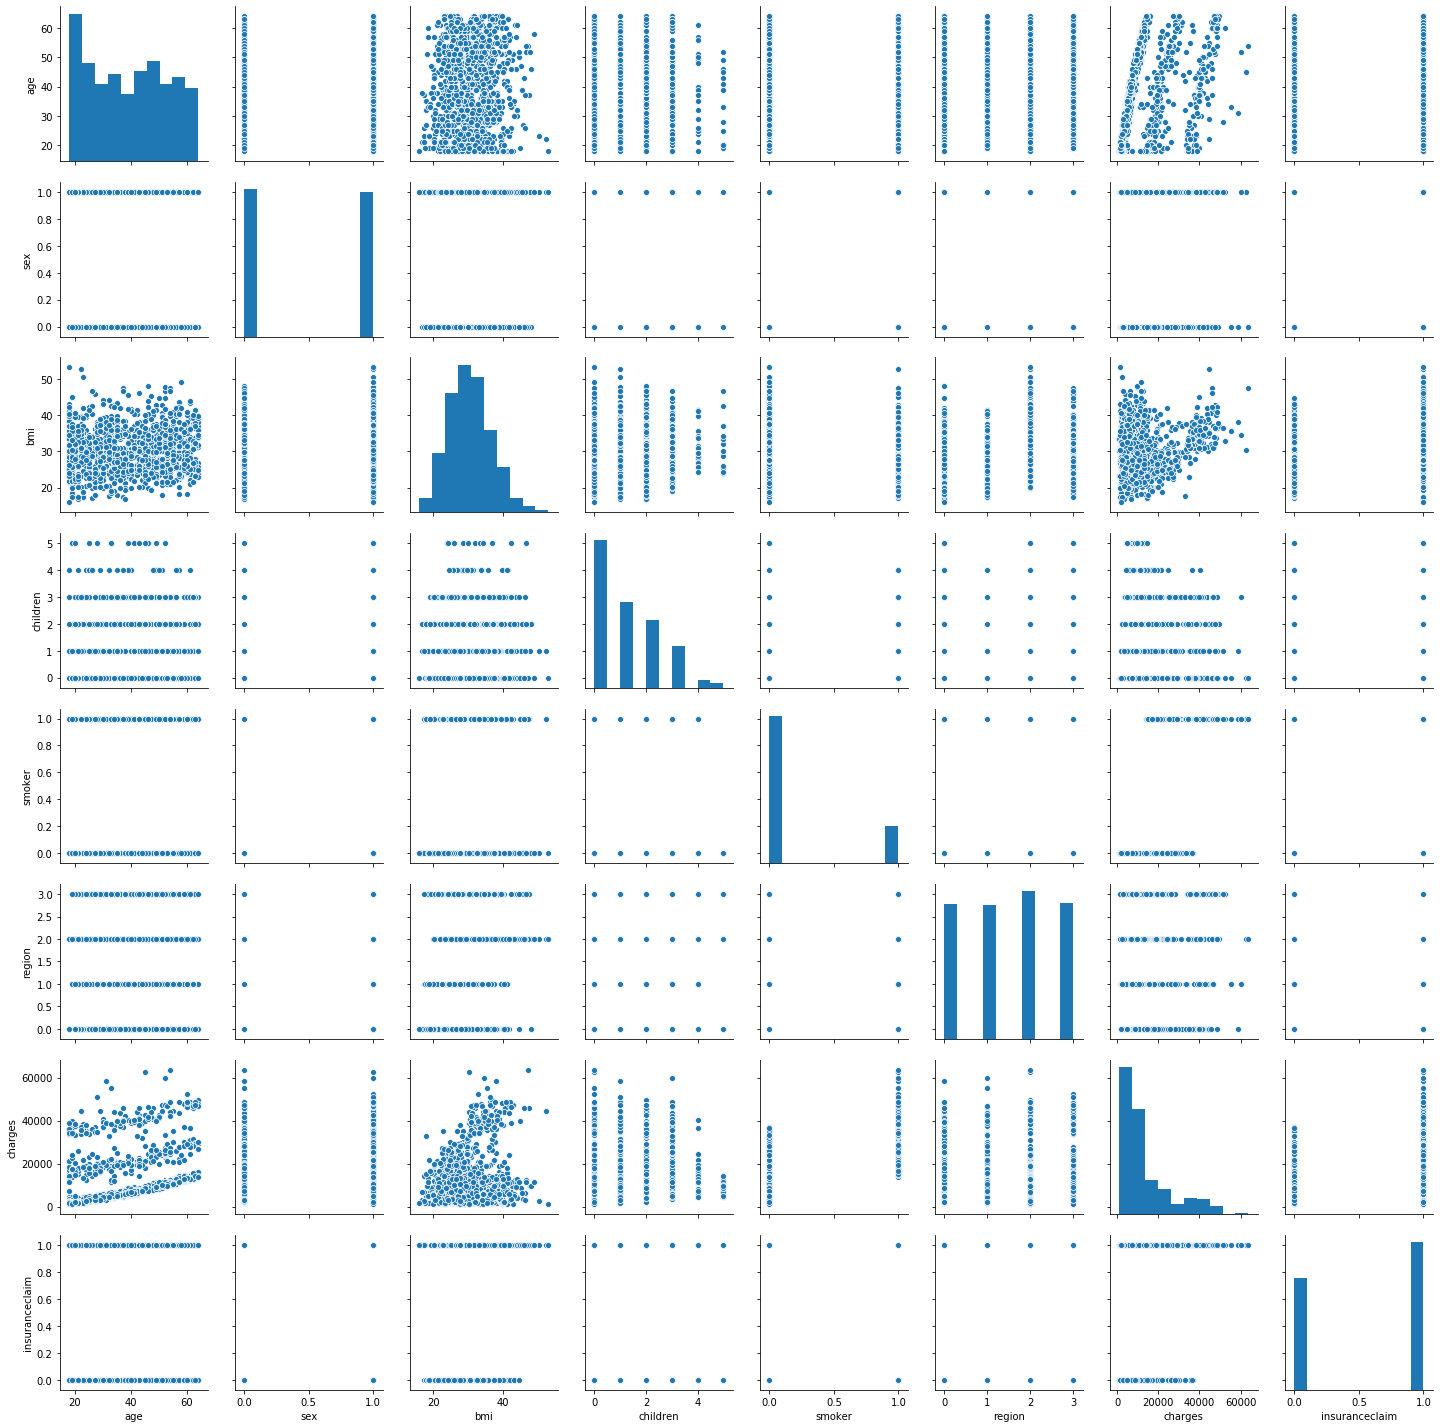

In [17]:
# Check the pair_plot for feature vs feature.This tells us which features are highly correlated with the other feature and 
# help us predict its better logistic regression model.
# create heatmap using seaborn

sns.pairplot(train)

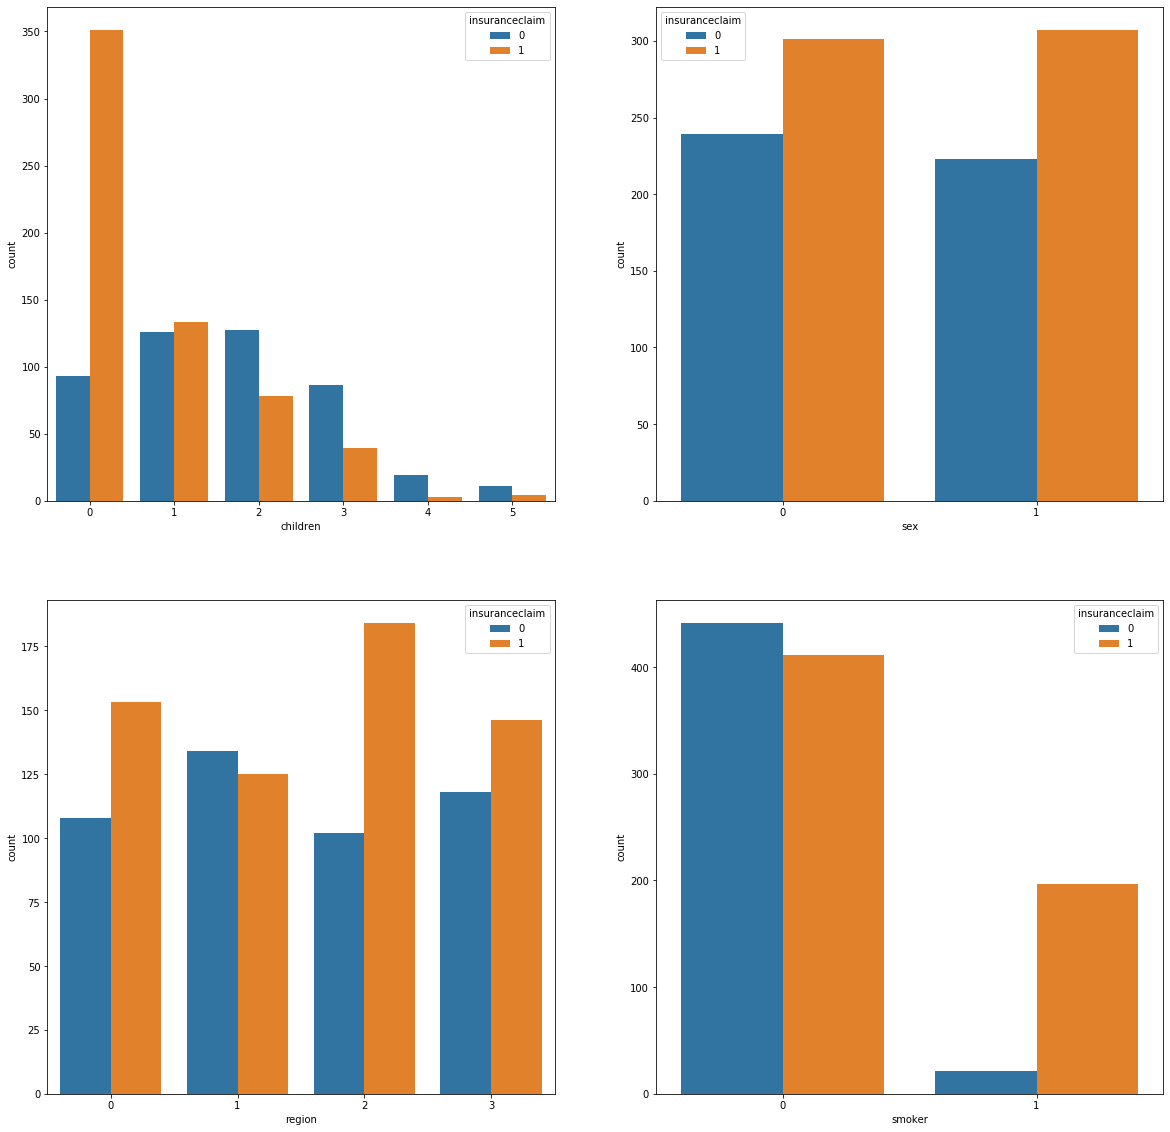

In [22]:
# Check the count_plot for different features vs target variable insuranceclaim. 
# This tells us which features are highly correlated with the target variable insuranceclaim and help us predict it better.

# store categorical variable

cols = ['children','sex','region','smoker']

# create subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# create loop for plotting countplot
for i in range(0,2):
    for j in range(0,2):
        col = cols[i*2 + j]
        sns.countplot(x=train[col], hue=train['insuranceclaim'], ax=axes[i,j])

In [26]:
# Using logistic regression to predict the insuranceclaim, train your model. 
# We will select the best model by cross-validation using Grid Search.

#store independent variable
X = train.drop('insuranceclaim',axis=1)

# store dependent variable
y = train['insuranceclaim']

# spliting the dataset
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.2,random_state = 6)

# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# instantiate logistic regression model
lr = LogisticRegression(random_state = 9)

# grid search on logistic regression
grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_val)
accuracy = accuracy_score(y_pred,y_val)

print("Accuracy is:",accuracy)

score = roc_auc_score(y_val,y_pred)
print("Score of the model is:",score)

Accuracy is: 0.780373831775701
Score of the model is: 0.7647849462365591


0.9220683879723985
0.8613799283154122


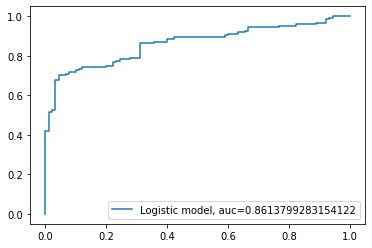

In [39]:
#visualize the performance of a binary classifier. Check the performance of the classifier using roc auc curve.

y_pred_proba = grid.predict_proba(X_val)[:,1]
print(y_pred_prob[0])

fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_proba)
roc_auc = roc_auc_score(y_val, y_pred_proba)
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()



In [54]:
# Prediction on test data

# Read the test data
test = pd.read_csv("C:\\Users\\hp\\Python Projects\\Projects\\Project_Logistic_Regression_Predict_Insurance_Claim\\test.csv")
test.head(10)

,Id,age,sex,bmi,children,smoker,region,charges
0,811,33,0,42.940,3,0,1,6360.99360
1,973,19,0,40.500,0,0,3,1759.33800
2,308,58,1,34.865,0,0,0,11944.59435
3,845,60,0,32.450,0,1,2,45008.95550
4,1050,44,0,36.955,1,0,1,8023.13545
5,221,53,0,33.250,0,0,0,10564.88450
6,1117,25,1,33.330,2,1,2,36124.57370
7,381,55,1,30.685,0,1,0,42303.69215
8,805,45,0,35.815,0,0,1,7731.85785
9,264,53,0,38.060,3,0,2,20462.99766


In [55]:

# Storing the id from the test file
id_ = test['Id']

# Applying same transformation on test
test.drop('Id',axis=1,inplace=True)

# make predictions 
y_pred_test = grid.predict_proba(test)[:,1]

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Cover_Type':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('Sample_submission_1.csv',index=False)

